In [1]:
import torch
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('model_with_architecture.pth')

In [3]:
def process_image(image):    
    img=PIL.Image.open(image)
    w,h = img.size
    if(w<h):
        new_w = 256
        ratio = float(new_w) / float(w)
        new_h = int(float(h) * float(ratio))
    else:
        new_h = 256
        ratio = float(new_h) / float(h)
        new_w = int(float(w) * float(ratio))
    img = img.resize((new_w , new_h), PIL.Image.ANTIALIAS)
    left = (new_w - 224)/2
    top = (new_h - 224)/2
    right = (new_w + 224)/2
    bottom = (new_h + 224)/2
    img = img.crop((left, top, right, bottom))
    np_image = np.array(img)
    np_image =np_image /255.0
    means = [0.485,0.456,0.406]
    sd = [0.229,0.224,0.225]
    np_image = np_image - means
    np_image = np_image / sd
    np_image_final = np_image.transpose((2,0,1))
    return np_image_final

In [4]:
def predict(image_path):
    img = process_image(image_path)   
    img = torch.from_numpy(img)
    img.unsqueeze_(0)
    img = img.float()
    with torch.no_grad():
        model.eval()
        logps = model(img)
        ps = torch.exp(logps)
        top_p,top_index = ps.topk(1 , dim=1)
        top_p=top_p.cpu().numpy()[0]
        top_index=top_index.cpu().numpy()[0]
        classes = ['Emergency', 'NonEmergency']
        return classes[top_index[0]]

In [5]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title(title)
    
    image = image.transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    return ax

In [14]:
image_list = []
for i in range(1,22,1):
    image_list.append("image_"+str(i)+".jpg")
print(image_list)

['image_1.jpg', 'image_2.jpg', 'image_3.jpg', 'image_4.jpg', 'image_5.jpg', 'image_6.jpg', 'image_7.jpg', 'image_8.jpg', 'image_9.jpg', 'image_10.jpg', 'image_11.jpg', 'image_12.jpg', 'image_13.jpg', 'image_14.jpg', 'image_15.jpg', 'image_16.jpg', 'image_17.jpg', 'image_18.jpg', 'image_19.jpg', 'image_20.jpg', 'image_21.jpg']


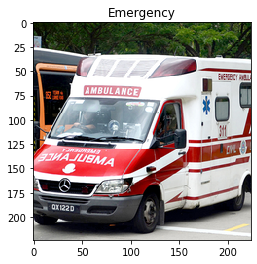

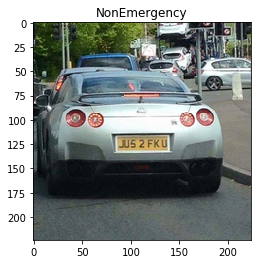

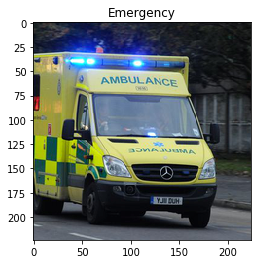

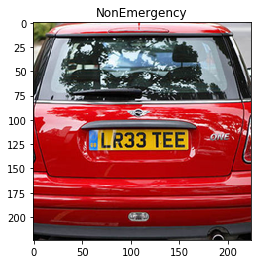

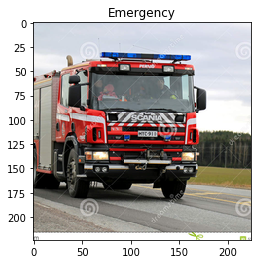

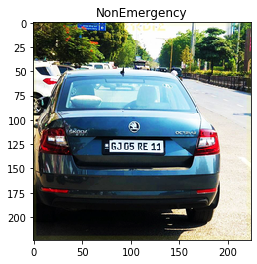

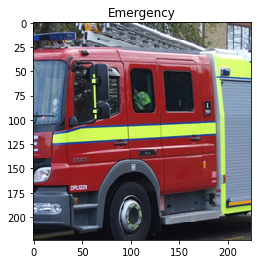

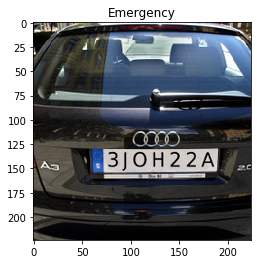

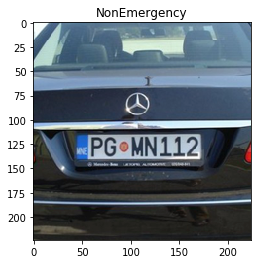

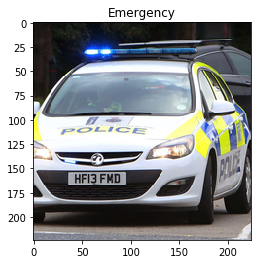

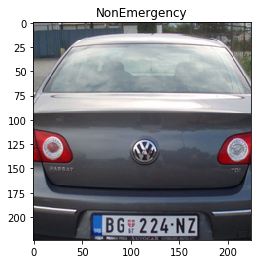

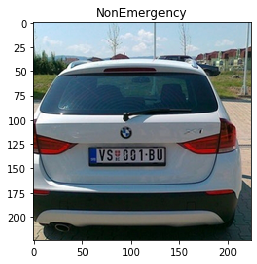

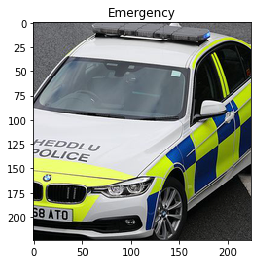

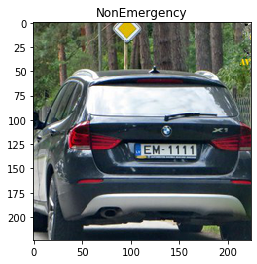

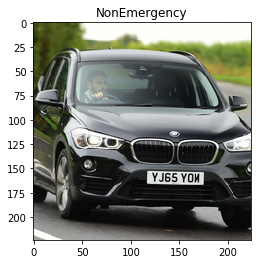

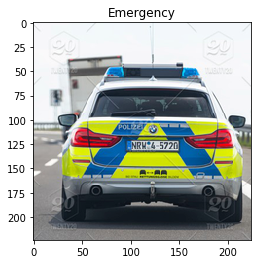

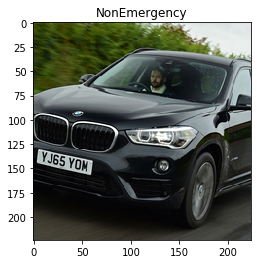

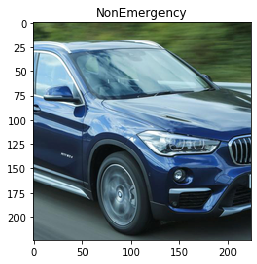

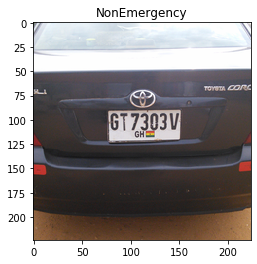

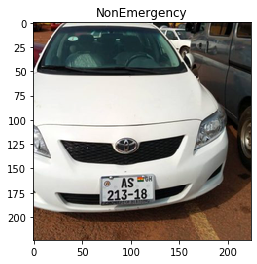

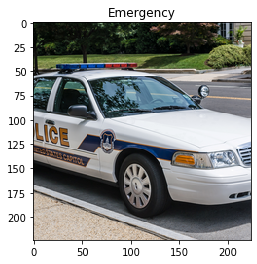

In [16]:
for image_path in image_list:
    img = process_image(image_path)
    predic = predict(image_path)
    ax = imshow(img,title=predic)  
    plt.show()